In [56]:
import micropip
await micropip.install('seaborn')

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [58]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [60]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

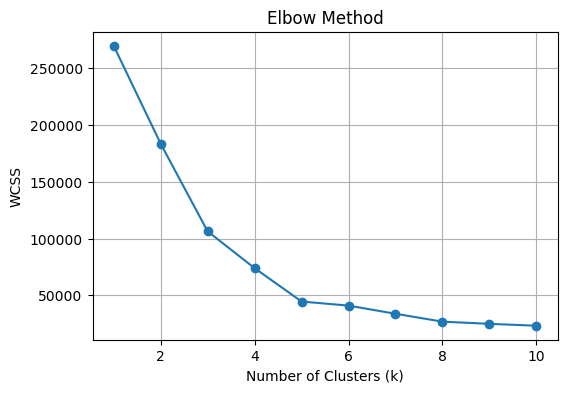

In [61]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [62]:
silhouette_scores = []
K = range(2, 11) 
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

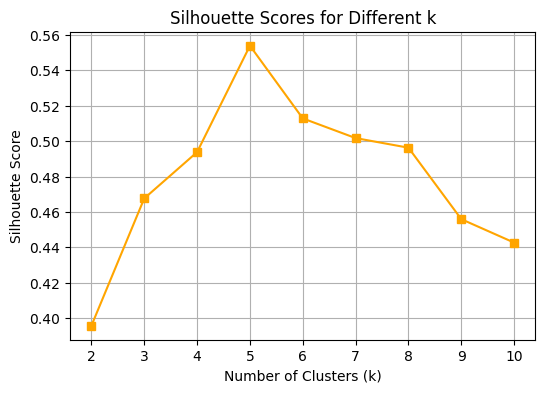

In [63]:
plt.figure(figsize=(6, 4))
plt.plot(K, silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [64]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

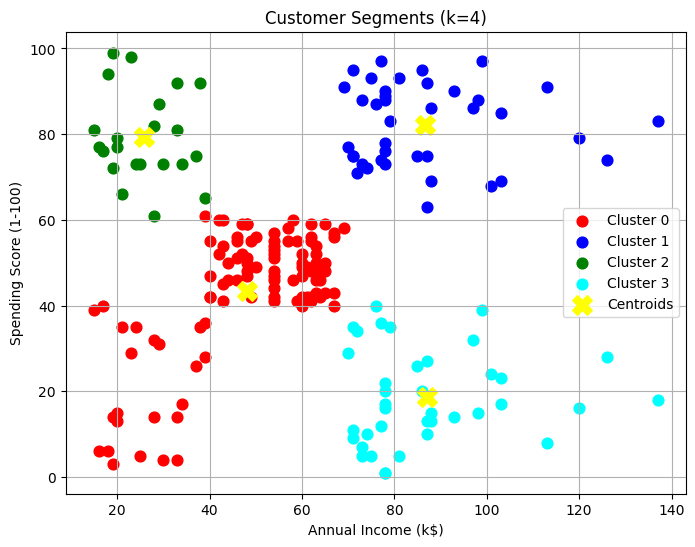

In [65]:
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'purple']
for i in range(k):
    plt.scatter(
        X[df['Cluster'] == i]['Annual Income (k$)'],
        X[df['Cluster'] == i]['Spending Score (1-100)'],
        s=60, c=colors[i], label=f'Cluster {i}'
    )

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids', marker='X')

plt.title(f'Customer Segments (k={k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
print("The First Five Clustered Data Of The Dataset:")
print()
df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()

The First Five Clustered Data Of The Dataset:



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
